<a href="https://colab.research.google.com/github/kisozipaul/filtermethods-for-feature-selection/blob/main/feature_slection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset/simulated_crop_yield_dataset.csv")
df.head()

,Temperature,Rainfall,Soil_pH,Soil_Moisture,Fertilizer_Used,Crop_Type,Yield
0,27.490802,137.026586,6.285117,23.454060,135.799382,Maize,3.513388
1,39.014286,208.380189,6.240936,25.933628,170.814849,Maize,1.736405
2,34.639879,274.589167,8.218764,15.009358,164.024139,Maize,1.422601
3,31.973170,246.444977,6.248639,22.497482,73.084986,Wheat,4.251404
4,23.120373,261.312230,6.315849,21.434920,72.387420,Maize,3.315026


In [5]:
df2 = df.drop(["Crop_Type"], axis=1)
df2.head()

,Temperature,Rainfall,Soil_pH,Soil_Moisture,Fertilizer_Used,Yield
0,27.490802,137.026586,6.285117,23.454060,135.799382,3.513388
1,39.014286,208.380189,6.240936,25.933628,170.814849,1.736405
2,34.639879,274.589167,8.218764,15.009358,164.024139,1.422601
3,31.973170,246.444977,6.248639,22.497482,73.084986,4.251404
4,23.120373,261.312230,6.315849,21.434920,72.387420,3.315026


In [19]:
df2.var()

,0
Temperature,34.137695
Rainfall,3414.997352
Soil_pH,0.760423
Soil_Moisture,32.830458
Fertilizer_Used,1850.848731
Yield,1.349436
new,0.000000


<Axes: >

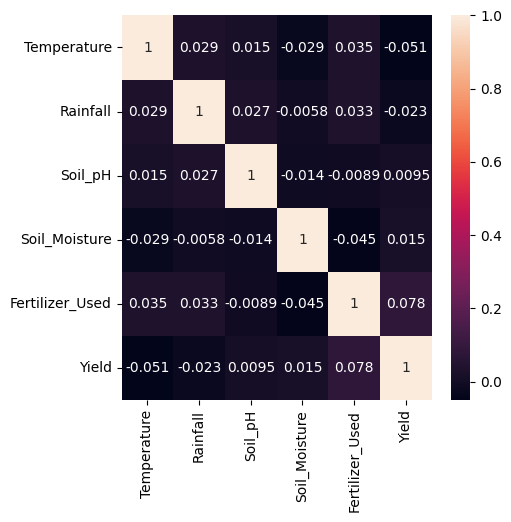

In [8]:
corl = df2.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corl, annot=True)

In [11]:
# Define a threshold
threshold = 0.5

# Find pairs of highly correlated features
highly_correlated = set()
for i in corl.columns:
    for j in corl.index:
        if i != j and abs(corl.loc[i, j]) > threshold:
            highly_correlated.add((i, j))

print(highly_correlated)


set()


In [12]:

# Set your threshold for filtering correlations (absolute value)
threshold = 0.1

# Get the correlation values with 'Yield' column only
yield_corr = corl['Yield'].abs()

# Select features where the correlation with 'Yield' is greater than the threshold
selected_features = yield_corr[yield_corr > threshold].index.tolist()

# Remove 'Yield' from the list if you only want to keep feature names
selected_features.remove('Yield')

print("Selected features with correlation above threshold with Yield:", selected_features)

# Filter your DataFrame to include only these selected features and the target
df_selected = df2[selected_features + ['Yield']]


Selected features with correlation above threshold with Yield: []


In [13]:
from sklearn.feature_selection import VarianceThreshold
df2["new"] = 50

df2.head()

,Temperature,Rainfall,Soil_pH,Soil_Moisture,Fertilizer_Used,Yield,new
0,27.490802,137.026586,6.285117,23.454060,135.799382,3.513388,50
1,39.014286,208.380189,6.240936,25.933628,170.814849,1.736405,50
2,34.639879,274.589167,8.218764,15.009358,164.024139,1.422601,50
3,31.973170,246.444977,6.248639,22.497482,73.084986,4.251404,50
4,23.120373,261.312230,6.315849,21.434920,72.387420,3.315026,50


In [18]:
threshold = 0
selector = VarianceThreshold(threshold=threshold)

# Fit and transform the dataset
selector = selector.fit(df2)

#selector.get_support()
# Get the names of the features that remain
selected_features = df2.columns[selector.get_support(indices=True)]

print("Selected features based on variance threshold:", selected_features)


Selected features based on variance threshold: Index(['Temperature', 'Rainfall', 'Soil_pH', 'Soil_Moisture',
       'Fertilizer_Used', 'Yield'],
      dtype='object')


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer

In [23]:
# Split the data into features (X) and target (y)
X = df2.drop(columns=['Yield'])
y = df2['Yield']


In [26]:
# Discretize the continuous target 'y' if it is not categorical
discretizer_y = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # 3 bins for target variable
y_binned = discretizer_y.fit_transform(y.values.reshape(-1, 1))  # Reshape to 2D for discretizer

# Discretize the features into categorical bins (e.g., 3 bins for each feature)
discretizer_X = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned = discretizer_X.fit_transform(X)

# Convert to DataFrame for better readability
X_binned = pd.DataFrame(X_binned, columns=X.columns)
y_binned = pd.Series(y_binned.flatten())  # Flatten back to 1D series for fitting

# Now apply SelectKBest with chi2
chi2_selector = SelectKBest(chi2, k=2)  # Select the top 2 features based on Chi-Square
X_new = chi2_selector.fit_transform(X_binned, y_binned)

# Get the selected feature indices
selected_columns = X.columns[chi2_selector.get_support()]
print("Selected features:", selected_columns)

Selected features: Index(['Soil_pH', 'Fertilizer_Used'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 5 is constant and will be replaced with 0.
  warnings.warn(


In [28]:
# Discretize the continuous target 'y' if it is not categorical
discretizer_y = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # 3 bins for target variable
y_binned = discretizer_y.fit_transform(y.values.reshape(-1, 1))  # Reshape to 2D for discretizer

# Discretize the features into categorical bins (e.g., 3 bins for each feature)
discretizer_X = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned = discretizer_X.fit_transform(X)

# Convert to DataFrame for better readability
X_binned = pd.DataFrame(X_binned, columns=X.columns)
y_binned = pd.Series(y_binned.flatten())  # Flatten back to 1D series for fitting

# Apply SelectKBest with chi2
chi2_selector = SelectKBest(chi2, k='all')  # Use 'all' to get scores for all features
X_new = chi2_selector.fit_transform(X_binned, y_binned)

# Get the Chi-Square scores for each feature
chi2_scores = chi2_selector.scores_

# Create a DataFrame to view the features and their corresponding Chi-Square scores
chi2_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores
})

# Sort the scores in descending order to see the most significant features first
chi2_scores_df = chi2_scores_df.sort_values(by='Chi2 Score', ascending=False)

# Display the Chi-Square scores
print(chi2_scores_df)

           Feature  Chi2 Score
2          Soil_pH    6.145015
4  Fertilizer_Used    5.130856
3    Soil_Moisture    1.490455
0      Temperature    0.851745
1         Rainfall    0.252937
5              new         NaN


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:263: UserWarning: Feature 5 is constant and will be replaced with 0.
  warnings.warn(


In [34]:
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
# Assuming 'df2' is your DataFrame and 'Yield' is the target variable
X = df2.drop(columns=['Yield'])  # Drop the target column to get the features
y = df2['Yield']  # The target variable

In [38]:
# Use SelectPercentile to select the top 20% of features based on ANOVA F-statistic
selector = SelectPercentile(score_func=f_regression , percentile=50) #f_classif
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Selected feature indices:", selected_features_indices)

# If you want to display the selected features in a more readable format (optional)
selected_features = X.iloc[:, selected_features_indices]
print("Selected features (top 20%):\n", selected_features)

Selected feature indices: [0 1 4]
Selected features (top 20%):
      Temperature    Rainfall  Fertilizer_Used
0      27.490802  137.026586       135.799382
1      39.014286  208.380189       170.814849
2      34.639879  274.589167       164.024139
3      31.973170  246.444977        73.084986
4      23.120373  261.312230        72.387420
..           ...         ...              ...
995    21.831641  231.391031       184.609598
996    38.346272  291.322924        67.907152
997    22.736373  113.791603        99.176426
998    39.004747  111.410944       172.361807
999    28.920115  156.437415       139.596857

[1000 rows x 3 columns]
